# Tarefa 1 - Pré-processamento

Disciplina de Introdução ao Aprendizado de Máquina - 2024.1

Professor: João Carlos Pereira da Silva

Aluno: Manoel Marcelo da Silva (121088349)

In [130]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelBinarizer

In [3]:
# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
df = pd.read_csv('./StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [35]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
# Check for duplicates

df.duplicated().sum()

0

## Medidas de Posição e Dispersão

In [9]:
# Medidas de Posição

# Média
mediaMath = np.mean(df['math score'])
mediaReading = np.mean(df['reading score'])
mediaWriting = np.mean(df['writing score'])

#Mediana
medianaMath = np.median(df['math score'])
medianaReading = np.median(df['reading score'])
medianaWriting = np.median(df['writing score'])

#Moda
modaMath = stats.mode(df['math score'])
modaReading = stats.mode(df['reading score'])
modaWriting = stats.mode(df['writing score'])

print('Média Math: ', mediaMath)
print('Média Reading: ', mediaReading)
print('Média Writing: ', mediaWriting)

print('Mediana Math: ', medianaMath)
print('Mediana Reading: ', medianaReading)
print('Mediana Writing: ', medianaWriting)

print('Moda Math: ', modaMath)
print('Moda Reading: ', modaReading)
print('Moda Writing: ', modaWriting)

Média Math:  66.089
Média Reading:  69.169
Média Writing:  68.054
Mediana Math:  66.0
Mediana Reading:  70.0
Mediana Writing:  69.0
Moda Math:  ModeResult(mode=65, count=36)
Moda Reading:  ModeResult(mode=72, count=34)
Moda Writing:  ModeResult(mode=74, count=35)


In [22]:
# Medidas de Dispersão

# Percentil
Q1Math = df['math score'].quantile(0.25)
Q2Math = df['math score'].quantile(0.50)
Q3Math = df['math score'].quantile(0.75)
IQRMath = Q3Math - Q1Math

Q1Reading = df['reading score'].quantile(0.25)
Q2Reading = df['reading score'].quantile(0.50)
Q3Reading = df['reading score'].quantile(0.75)
IQRReading = Q3Reading - Q1Reading

Q1Writing = df['writing score'].quantile(0.25)
Q2Writing = df['writing score'].quantile(0.50)
Q3Writing = df['writing score'].quantile(0.75)
IQRWriting = Q3Writing - Q1Writing


print('Percentil Math: ', Q1Math, Q2Math, Q3Math)
print('IQR Math: ', IQRMath)
print('Percentil Reading: ', Q1Reading, Q2Reading, Q3Reading)
print('IQR Reading: ', IQRReading)
print('Percentil Writing: ', Q1Writing, Q2Writing, Q3Writing)
print('IQR Writing: ', IQRWriting)


Percentil Math:  57.0 66.0 77.0
IQR Math:  20.0
Percentil Reading:  59.0 70.0 79.0
IQR Reading:  20.0
Percentil Writing:  57.75 69.0 79.0
IQR Writing:  21.25


In [13]:
# Desvio Padrão

stdMath = df['math score'].std()
stdReading = df['reading score'].std()
stdWriting = df['writing score'].std()

# Variância
varMath = df['math score'].var()
varReading = df['reading score'].var()
varWriting = df['writing score'].var()

print('Desvio Padrão Math: ', stdMath)
print('Desvio Padrão Reading: ', stdReading)
print('Desvio Padrão Writing: ', stdWriting)
print('\n')

print('Variância Math: ', varMath)
print('Variância Reading: ', varReading)
print('Variância Writing: ', varWriting)

Desvio Padrão Math:  15.16308009600945
Desvio Padrão Reading:  14.600191937252216
Desvio Padrão Writing:  15.19565701086965


Variância Math:  229.91899799799796
Variância Reading:  213.16560460460462
Variância Writing:  230.907991991992


In [15]:
# Z-Score
zMath = stats.zscore(df['math score'])
zReading = stats.zscore(df['reading score'])
zWriting = stats.zscore(df['writing score'])

print('\nZ-Score Math: \n', zMath)
print('\nZ-Score Reading: \n', zReading)
print('\nZ-Score Writing: \n', zWriting)


Z-Score Math: 
 0      0.390024
1      0.192076
2      1.577711
3     -1.259543
4      0.653954
         ...   
995    1.445746
996   -0.269803
997   -0.467751
998    0.126093
999    0.719937
Name: math score, Length: 1000, dtype: float64

Z-Score Reading: 
 0      0.193999
1      1.427476
2      1.770109
3     -0.833899
4      0.605158
         ...   
995    2.044215
996   -0.970952
997    0.125472
998    0.605158
999    1.153370
Name: reading score, Length: 1000, dtype: float64

Z-Score Writing: 
 0      0.391492
1      1.313269
2      1.642475
3     -1.583744
4      0.457333
         ...   
995    1.774157
996   -0.859491
997   -0.201079
998    0.589015
999    1.181586
Name: writing score, Length: 1000, dtype: float64


## Histogramas e Boxplots

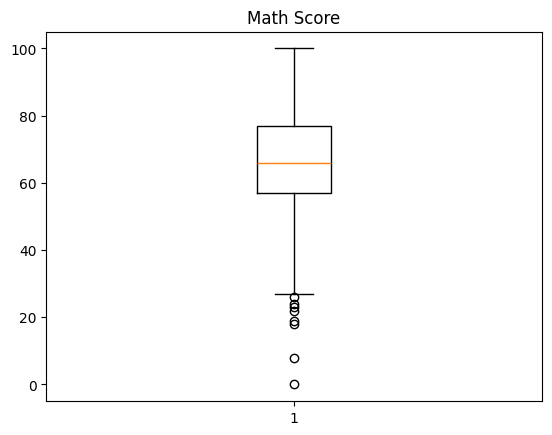

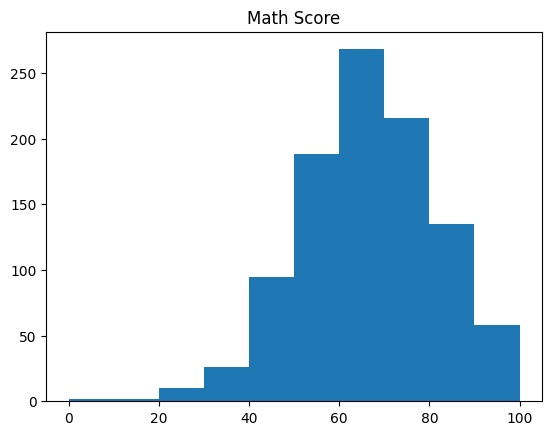

In [21]:
# Boxplot Math

plt.boxplot(df['math score'])
plt.title('Math Score')
plt.show()

# Histograma Math

plt.hist(df['math score'], bins=10)
plt.title('Math Score')
plt.show()

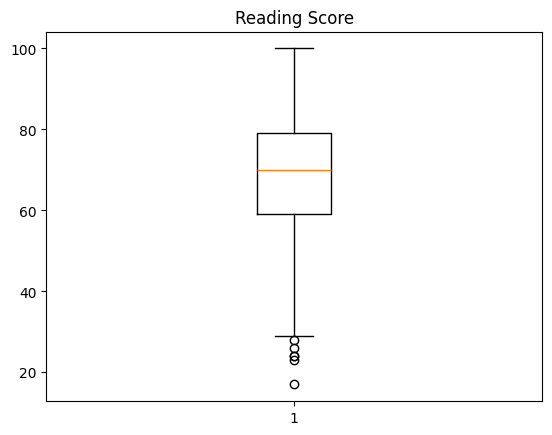

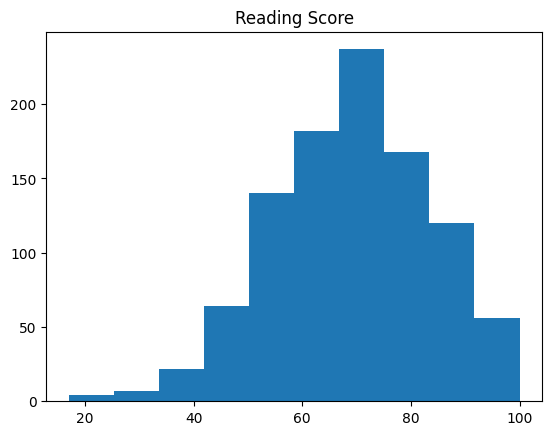

In [20]:
# Boxplot Reading

plt.boxplot(df['reading score'])
plt.title('Reading Score')
plt.show()

# Histograma Reading

plt.hist(df['reading score'], bins=10)
plt.title('Reading Score')
plt.show()

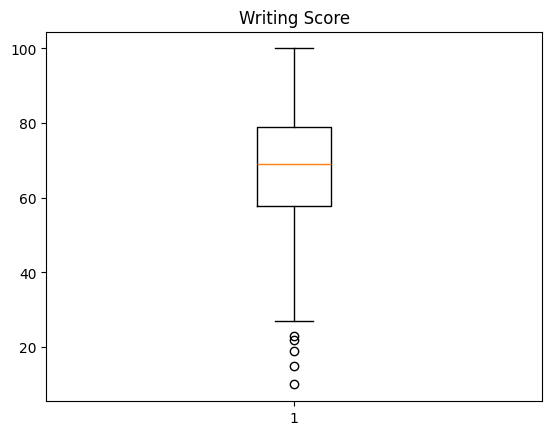

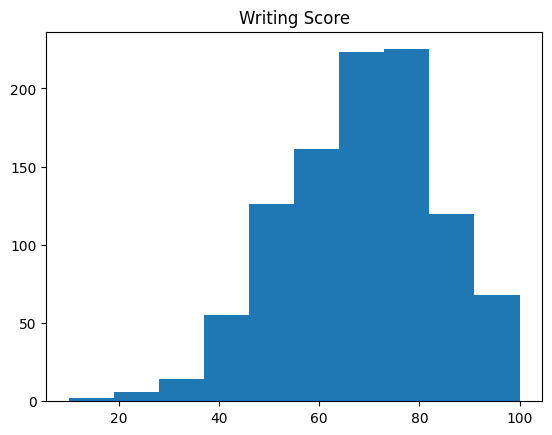

In [19]:
# Boxplot Writing

plt.boxplot(df['writing score'])
plt.title('Writing Score')
plt.show()

# Histograma Writing

plt.hist(df['writing score'], bins=10)
plt.title('Writing Score')
plt.show()

## Outliers

In [28]:
# Encontrando Outliers

# Usando Z-Score

thresholdZ = 3
indexOutliersMath = np.where(zMath > thresholdZ)[0]
indexOutliersReading = np.where(zReading > thresholdZ)[0]
indexOutliersWriting = np.where(zWriting > thresholdZ)[0]

print('Outliers Math: ', indexOutliersMath)
print('Outliers Reading: ', indexOutliersReading)
print('Outliers Writing: ', indexOutliersWriting)

Outliers Math:  []
Outliers Reading:  []
Outliers Writing:  []


In [34]:
# Usando IQR

upperBoundMath = Q3Math + 1.5 * IQRMath
lowerBoundMath = Q1Math - 1.5 * IQRMath

upperBoundReading = Q3Reading + 1.5 * IQRReading
lowerBoundReading = Q1Reading - 1.5 * IQRReading

upperBoundWriting = Q3Writing + 1.5 * IQRWriting
lowerBoundWriting = Q1Writing - 1.5 * IQRWriting

indexOutliersMathIQR = np.where((df['math score'] >= upperBoundMath) | (df['math score'] <= lowerBoundMath))[0]
indexOutliersReadingIQR = np.where((df['reading score'] >= upperBoundReading) | (df['reading score'] <= lowerBoundReading))[0]
indexOutliersWritingIQR = np.where((df['writing score'] >= upperBoundWriting) | (df['writing score'] <= lowerBoundWriting))[0]

print('Upper and Lower Bound Math: ', upperBoundMath, lowerBoundMath)
print('Outliers Math IQR: ', indexOutliersMathIQR)
print('\n')

print('Upper and Lower Bound Reading: ', upperBoundReading, lowerBoundReading)
print('Outliers Reading IQR: ', indexOutliersReadingIQR)
print('\n')

print('Upper and Lower Bound Writing: ', upperBoundWriting, lowerBoundWriting)
print('Outliers Writing IQR: ', indexOutliersWritingIQR)

Upper and Lower Bound Math:  107.0 27.0
Outliers Math IQR:  [ 17  59  91 145 338 363 466 787 842 980]


Upper and Lower Bound Reading:  109.0 29.0
Outliers Reading IQR:  [ 59  76 211 327 596 601 896 980]


Upper and Lower Bound Writing:  110.875 25.875
Outliers Writing IQR:  [ 59  76 327 596 980]


### Remoção de Outliers

In [37]:
# Teste de Remoção de Outliers IQR (Math, Reading e Writing)

dfMath = df.drop(indexOutliersMathIQR)
dfReading = df.drop(indexOutliersReadingIQR)
dfWriting = df.drop(indexOutliersWritingIQR)

In [43]:
print('Shape Math: ', dfMath.shape)
print('Shape Reading: ', dfReading.shape)
print('Shape Writing: ', dfWriting.shape)

Shape Math:  (990, 8)
Shape Reading:  (992, 8)
Shape Writing:  (995, 8)


In [48]:
# Alterações

# Medidas de Posição

# Média
newMediaMath = np.mean(dfMath['math score'])
newMediaReading = np.mean(dfReading['reading score'])
newMediaWriting = np.mean(dfWriting['writing score'])

#Mediana
newMedianaMath = np.median(dfMath['math score'])
newMedianaReading = np.median(dfReading['reading score'])
newMedianaWriting = np.median(dfWriting['writing score'])

#Moda
newModaMath = stats.mode(dfMath['math score'])
newModaReading = stats.mode(dfReading['reading score'])
newModaWriting = stats.mode(dfWriting['writing score'])

print('Nova Média Math: ', newMediaMath)
print('Diferença Média Math: ', newMediaMath - mediaMath)
print('Nova Média Reading: ', newMediaReading)
print('Diferença Média Reading: ', newMediaReading - mediaReading)
print('Nova Média Writing: ', newMediaWriting)
print('Diferença Média Writing: ', newMediaWriting - mediaWriting)
print('\n')
print('Nova Mediana Math: ', newMedianaMath)
print('Diferença Mediana Math: ', newMedianaMath - medianaMath)
print('Nova Mediana Reading: ', newMedianaReading)
print('Diferença Mediana Reading: ', newMedianaReading - medianaReading)
print('Nova Mediana Writing: ', newMedianaWriting)
print('Diferença Mediana Writing: ', newMedianaWriting - medianaWriting)
print('\n')
print('Nova Moda Math: ', newModaMath)
print('Moda Math: ', modaMath)
print('Nova Moda Reading: ', newModaReading)
print('Moda Reading: ', modaReading)
print('Nova Moda Writing: ', newModaWriting)
print('Moda Writing: ', modaWriting)


Nova Média Math:  66.56060606060606
Diferença Média Math:  0.4716060606060637
Nova Média Reading:  69.52520161290323
Diferença Média Reading:  0.3562016129032344
Nova Média Writing:  68.30653266331659
Diferença Média Writing:  0.2525326633165861


Nova Mediana Math:  66.0
Diferença Mediana Math:  0.0
Nova Mediana Reading:  70.0
Diferença Mediana Reading:  0.0
Nova Mediana Writing:  69.0
Diferença Mediana Writing:  0.0


Nova Moda Math:  ModeResult(mode=65, count=36)
Moda Math:  ModeResult(mode=65, count=36)
Nova Moda Reading:  ModeResult(mode=72, count=34)
Moda Reading:  ModeResult(mode=72, count=34)
Nova Moda Writing:  ModeResult(mode=74, count=35)
Moda Writing:  ModeResult(mode=74, count=35)


In [50]:
# Medidas de Dispersão

# Percentil
newQ1Math = dfMath['math score'].quantile(0.25)
newQ2Math = dfMath['math score'].quantile(0.50)
newQ3Math = dfMath['math score'].quantile(0.75)
newIQRMath = newQ3Math - newQ1Math

newQ1Reading = dfReading['reading score'].quantile(0.25)
newQ2Reading = dfReading['reading score'].quantile(0.50)
newQ3Reading = dfReading['reading score'].quantile(0.75)
newIQRReading = newQ3Reading - newQ1Reading

newQ1Writing = dfWriting['writing score'].quantile(0.25)
newQ2Writing = dfWriting['writing score'].quantile(0.50)
newQ3Writing = dfWriting['writing score'].quantile(0.75)
newIQRWriting = newQ3Writing - newQ1Writing

print('Novo Percentil Math: ', newQ1Math, newQ2Math, newQ3Math)
print('Percentil Math: ', Q1Math, Q2Math, Q3Math)
print('Diferença IQR Math: ', newIQRMath - IQRMath)
print('\n')
print('Novo Percentil Reading: ', newQ1Reading, newQ2Reading, newQ3Reading)
print('Percentil Reading: ', Q1Reading, Q2Reading, Q3Reading)
print('Diferença IQR Reading: ', newIQRReading - IQRReading)
print('\n')
print('Novo Percentil Writing: ', newQ1Writing, newQ2Writing, newQ3Writing)
print('Percentil Writing: ', Q1Writing, Q2Writing, Q3Writing)
print('Diferença IQR Writing: ', newIQRWriting - IQRWriting)


Novo Percentil Math:  57.0 66.0 77.0
Percentil Math:  57.0 66.0 77.0
Diferença IQR Math:  0.0


Novo Percentil Reading:  60.0 70.0 80.0
Percentil Reading:  59.0 70.0 79.0
Diferença IQR Reading:  0.0


Novo Percentil Writing:  58.0 69.0 79.0
Percentil Writing:  57.75 69.0 79.0
Diferença IQR Writing:  -0.25


In [54]:
# Desvio Padrão

newStdMath = dfMath['math score'].std()
newStdReading = dfReading['reading score'].std()
newStdWriting = dfWriting['writing score'].std()

# Variância
newVarMath = dfMath['math score'].var()
newVarReading = dfReading['reading score'].var()
newVarWriting = dfWriting['writing score'].var()

print('Novo Desvio Padrão Math: ', newStdMath)
print('Desvio Padrão Math: ', stdMath)
print('Diferença Desvio Padrão Math: ', newStdMath - stdMath)
print('\n')
print('Novo Desvio Padrão Reading: ', newStdReading)
print('Desvio Padrão Reading: ', stdReading)
print('Diferença Desvio Padrão Reading: ', newStdReading - stdReading)
print('\n')
print('Novo Desvio Padrão Writing: ', newStdWriting)
print('Desvio Padrão Writing: ', stdWriting)
print('Diferença Desvio Padrão Writing: ', newStdWriting - stdWriting)
print('\n')

print('Nova Variância Math: ', newVarMath)
print('Variância Math: ', varMath)
print('Diferença Variância Math: ', newVarMath - varMath)
print('\n')
print('Nova Variância Reading: ', newVarReading)
print('Variância Reading: ', varReading)
print('Diferença Variância Reading: ', newVarReading - varReading)
print('\n')
print('Nova Variância Writing: ', newVarWriting)
print('Variância Writing: ', varWriting)
print('Diferença Variância Writing: ', newVarWriting - varWriting)

Novo Desvio Padrão Math:  14.465951923462725
Desvio Padrão Math:  15.16308009600945
Diferença Desvio Padrão Math:  -0.6971281725467247


Novo Desvio Padrão Reading:  14.103100615911385
Desvio Padrão Reading:  14.600191937252216
Diferença Desvio Padrão Reading:  -0.49709132134083056


Novo Desvio Padrão Writing:  14.804952796327903
Desvio Padrão Writing:  15.19565701086965
Diferença Desvio Padrão Writing:  -0.3907042145417474


Nova Variância Math:  209.26376505193494
Variância Math:  229.91899799799796
Diferença Variância Math:  -20.655232946063023


Nova Variância Reading:  198.8974469825201
Variância Reading:  213.16560460460462
Diferença Variância Reading:  -14.268157622084516


Nova Variância Writing:  219.1866273014974
Variância Writing:  230.907991991992
Diferença Variância Writing:  -11.721364690494596


## Transformação de Dados Numéricos

### Normalização

In [61]:
scaler = MinMaxScaler()
dfNorm = df.copy()
dfNorm[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
dfNorm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


### Padronização

In [62]:
scaler = StandardScaler()
dfStand = df.copy()
dfStand[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
dfStand.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269
2,female,group B,master's degree,standard,none,1.577711,1.770109,1.642475
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744
4,male,group C,some college,standard,none,0.653954,0.605158,0.457333


### IQR 

In [63]:
scaler = RobustScaler()
dfRobust = df.copy()
dfRobust[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
dfRobust.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.30,0.10,0.235294
1,female,group C,some college,standard,completed,0.15,1.00,0.894118
2,female,group B,master's degree,standard,none,1.20,1.25,1.129412
3,male,group A,associate's degree,free/reduced,none,-0.95,-0.65,-1.176471
4,male,group C,some college,standard,none,0.50,0.40,0.282353


## Transformação de Dados Categóricos

### Codificação Ordinal

In [72]:
# Cria o codificador
lb = OrdinalEncoder()
dfOrdinal = df.copy()

# Aplica o codificador
dfOrdinal[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']] = lb.fit_transform(dfOrdinal[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']])
lb.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [73]:
dfOrdinal.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75


### Codificação One-Hot

In [116]:
dfOneHot = df.copy()

# Cria o codificador
onehot = OneHotEncoder()

# Seleciona apenas as colunas categóricas
df_categorical = dfOneHot.select_dtypes(include=['object'])

# Ajusta o codificador aos dados e transforma
dfOneHot_encoded = onehot.fit_transform(df_categorical)

# Converte os dados codificados em um dataframe
dfOneHot_encoded = pd.DataFrame(dfOneHot_encoded.toarray(), columns=onehot.get_feature_names_out(df_categorical.columns))

# Substitui as colunas originais no dataframe
dfOneHot.drop(df_categorical.columns, axis=1, inplace=True)
dfOneHot = pd.concat([dfOneHot_encoded, dfOneHot], axis=1)

lb.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object),
 array([  0,   8,  18,  19,  22,  23,  24,  26,  27,  28,  29,  30,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100]),
 array([ 17,  23,  24,  26,  28,  29,  31,  32,  34,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  

In [115]:
dfOneHot.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,72,72,74
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,69,90,88
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,90,95,93
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,47,57,44
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,76,78,75


### Codificação Dummy (Binary)


In [138]:
# Usando apenas a coluna Parental Level of Education
dfBinary = df.copy()

# Cria o codificador
lb = LabelBinarizer()

# Aplica o codificador
bin = lb.fit_transform(dfBinary['parental level of education'])

print(bin)

[[0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


# Relatório

### 1) Avalie os atributos numéricos utilizando as medidas de posição e dispersão vistas em aula.

Os atributos numéricos foram avaliados acima, usando bibliotecas do Python para calcular as medidas de posição e dispersão.

### 2) Gere histogramas e gráficos boxplots para os atributos que forem analisados.


Os histogramas e boxplots estão disponíveis acima.

### 3) Existem pontos que são classificados como outliers por apenas um dos métodos?

Existem sim. O método de IQR encontrou vários pontos como outliers, porém o método de Z-Score com 3 desvios padrões não encontrou nenhum ponto como outlier

### 4) Se você remover os outliers, como isso afeta as medidas de posição e dispersão que você obteve ?

Nas medidas de posição, a moda e a mediana não são afetadas neste caso, porém a média é afetada, mas em um pequeno valor. Porém nas medidas de dispersão, a variância e o desvio padrão são afetados, diminuindo o seu valor, já que estamos excluindo os valores mais extremos.

###  5) Existem atributos que possuem variância zero ou próxima de zero?

Neste caso, não existem atributos numéricos com variância zero ou próxima de zero. Na verdade, a variância de todos os atributos é relativamente significativa.

### 6) Caso o seu dataset contenha valores NaN, decida se estes valores devem ser preenchidos pela média ou pela mediana. Justifique sua escolha. 

Neste dataset não existem valores NaN, porém, caso existissem, eu escolheria preencher com a mediana, pois como é perceptível nos histogramas, a distribuição dos dados não é simétrica, e a média pode ser afetada por outliers.

### 7) Verifique se existem dados duplicados. 

Neste dataset não existem dados duplicados.